In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
from math import cos, sin, pi, floor, ceil, tan
import cv2

%matplotlib inline

In [11]:
# integer part
def ipart(x):
    if x > 0:
        i = floor(x)
    else:
        i = ceil(x)
    return i

def _round(x): 
    return ipart(x + 0.5)

# fractional part
def fpart(x):
    return x-ipart(x)

def rfpart(x): 
    return 1 - fpart(x)

def sqrt(x):
    return x**0.5


def main(x1, y1, x2, y2):
    
    
    dx = x2 - x1
    dy = y2 - y1
    
    x = np.zeros(floor(2*sqrt(dx**2+dy**2)))
    y = np.zeros(len(x))
    c = np.zeros(len(x))
    
    swapped = False
    
    if abs(dx) < abs(dy):
        y1, x1 = x1, y1
        y2, x2 = x2, y2
        dy, dx = dx, dy
        swapped = True

    if x2 < x1:
        x2, x1 = x1, x2
        y2, y1 = y1, y2
        
    gradient = dy / dx
    
##########################################################
    
    xend = _round(x1)
    yend = y1 + gradient * (xend - x1)
    xgap = rfpart(x1 + 0.5)
    xpxl1 = xend #  % this will be used in the main loop
    ypxl1 = ipart(yend)
    x[0]=xpxl1
    y[0]=ypxl1
    c[0]=rfpart(yend) * xgap
    x[1]=xpxl1
    y[1]=ypxl1 + 1
    c[1]=fpart(yend) * xgap
    intery = yend + gradient # % first y-intersection for the main loop
    
    xend = _round(x2)
    yend = y2 + gradient * (xend - x2)
    xgap = fpart(x2 + 0.5)
    xpxl2 = xend  # this will be used in the main loop
    ypxl2 = ipart (yend)
    x[2]=xpxl2 
    y[2]=ypxl2 
    c[2]=rfpart(yend) * xgap
    x[3]=xpxl2 
    y[3]=ypxl2 + 1 
    c[3]=fpart(yend) * xgap
    
    k = 4
    
    for i in range(xpxl1 + 1, xpxl2 - 1):
        x[k]=i
        y[k]=ipart(intery)
        c[k]=rfpart(intery)
        k=k+1
        x[k]=i
        y[k]=ipart(intery) + 1
        c[k]=fpart(intery)
        intery = intery + gradient 
        k=k+1
    
    # truncate the vectors to proper sizes
    x = x[1:k-1]
    y = y[1:k-1]
    c = c[1:k-1]
    
    if swapped:        
        y, x= x, y
        
    return x, y, c
        

True

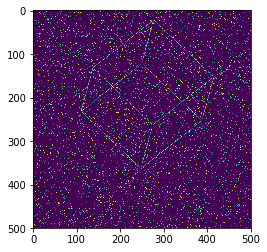

In [12]:
def distance_l(x1, y1, x2, y2, x3, y3, x4, y4):
    A1 = y2 - y1
    B1 = x1 - x2
    C1 = x1*(y1-y2)+y1*(x2-x1)
    A2 = y4 - y3
    B2 = x4 - x3
    C2 = x3*(y3-y4)+y3*(x4-x3)
    return abs(C2 - C1)*1. / (A1**2 + B1**2)**0.5

def P(p_value):
    porog = np.random.uniform(0, 100)
    return porog < p_value*100
    
    
def noisy(image, p_value):
    
    def P(p_value):
        porog = np.random.uniform(0, 100)
        return porog < p_value*100
    
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            if P(p_value):
                image[y][x] = np.random.uniform(0, 255)
                
    return image


def create_cube(a):
    return np.array([[0, 0, 0], # 0
                     [0, 0, a], # 1
                     [0, a, a], # 2
                     [0, a, 0], # 3
                     [a, a, 0], # 4
                     [a, 0, 0], # 5
                     [a, 0, a], # 6
                     [a, a, a]])# 7


def is_good(CUBE):
    
    def distance_V(CUBE):
        for i in range(len(CUBE)):
            for g in range(i+1, len(CUBE)):
                if ((CUBE[i] - CUBE[g])**2).sum() < 10000:
                    return False
        return True
    
    up = np.int64(CUBE <= 500).sum()
    down = np.int64(CUBE >= 0).sum()
    is_dist_v = distance_V(CUBE)
    return up == down == 16 and is_dist_v


# def picture(CUBE):
#     image = np.zeros((500, 500))
#     for px in CUBE:
#         x, y = px
#         image[y][x] = 255
#         image[y-1][x] = 255
#         image[y+1][x] = 255
#         image[y][x-1] = 255
#         image[y][x+1] = 255
#         image[y][x] = 255
#         image[y-1][x-1] = 255
#         image[y-1][x+1] = 255
#         image[y+1][x-1] = 255
#         image[y+1][x+1] = 255
        
#     plt.imshow(image)
#     return image


while(True):

    image = np.zeros((500, 500))
    a = random.uniform(a=150, b=300)
    cube = create_cube(a)
    
    x, y = random.uniform(a=0, b=500), random.uniform(a=0, b=500)
    
    alpha = random.uniform(a=0, b=2*pi)
    beta = random.uniform(a=0, b=2*pi)
    gamma = random.uniform(a=0, b=2*pi)
    
    X_rotate = np.array([[1, 0, 0],
                         [0, cos(alpha), -sin(alpha)],
                         [0, sin(alpha), cos(alpha)]])

    Y_rotate = np.array([[cos(beta), 0, -sin(beta)],
                         [0, 1, 0],
                         [sin(beta), 0, cos(beta)]])

    Z_rotate = np.array([[cos(gamma), -sin(gamma), 0],
                         [sin(gamma), cos(gamma), 0], 
                         [0, 0, 1]])


    ROTATE = X_rotate.dot(Y_rotate).dot(Z_rotate)
    
    cube_rotate = cube.dot(ROTATE)

    cube_x_y = cube_rotate[:,:2] + np.array([x, y])
    
    CUBE = np.int64(cube_x_y)
    
    list_l = [int(distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1])<50),
              int(distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1])<50),
              int(distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1])<50),
              int(distance_l(CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1],CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1])<50),
              int(distance_l(CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1])<50),
              int(distance_l(CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1])<50),
              int(distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1])<50),
              int(distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1])<50),
              int(distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1])<50),
              int(distance_l(CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1],CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1])<50),
              int(distance_l(CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1])<50),
              int(distance_l(CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1])<50),
              int(distance_l(CUBE[6][0],CUBE[6][1],CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1])<50),
              int(distance_l(CUBE[6][0],CUBE[6][1],CUBE[1][0],CUBE[1][1],CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1])<50),
              int(distance_l(CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1],CUBE[1][0],CUBE[1][1],CUBE[6][0],CUBE[6][1])<50),
              int(distance_l(CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1],CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1])<50),
              int(distance_l(CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1],CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1])<50),
              int(distance_l(CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1],CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1])<50)]

    
    if sum(list_l) == 0 and is_good(CUBE):
        break
        
        
# image = picture(CUBE)


x1, y1, c1 = main(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1])
x2, y2, c2 = main(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1])
x3, y3, c3 = main(CUBE[2][0],CUBE[2][1],CUBE[3][0],CUBE[3][1])
x4, y4, c4 = main(CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1])
x5, y5, c5 = main(CUBE[4][0],CUBE[4][1],CUBE[5][0],CUBE[5][1])
x6, y6, c6 = main(CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1])
x7, y7, c7 = main(CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1])
x8, y8, c8 = main(CUBE[6][0],CUBE[6][1],CUBE[1][0],CUBE[1][1])
x9, y9, c9 = main(CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1])
x10, y10, c10 = main(CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1])
x11, y11, c11 = main(CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1])
x12, y12, c12 = main(CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1])

for x1_, y1_, c1_ in zip(x1, y1, c1):
    image[int(y1_)][int(x1_)] = c1_ * 255
    
for x2_, y2_, c2_ in zip(x2, y2, c2):
    image[int(y2_)][int(x2_)] = c2_ * 255
    
for x3_, y3_, c3_ in zip(x3, y3, c3):
    image[int(y3_)][int(x3_)] = c3_ * 255
    
for x4_, y4_, c4_ in zip(x4, y4, c4):
    image[int(y4_)][int(x4_)] = c4_ * 255
    
for x5_, y5_, c5_ in zip(x5, y5, c5):
    image[int(y5_)][int(x5_)] = c5_ * 255
    
for x6_, y6_, c6_ in zip(x6, y6, c6):
    image[int(y6_)][int(x6_)] = c6_ * 255
    
for x7_, y7_, c7_ in zip(x7, y7, c7):
    image[int(y7_)][int(x7_)] = c7_ * 255
    
for x8_, y8_, c8_ in zip(x8, y8, c8):
    image[int(y8_)][int(x8_)] = c8_ * 255
    
for x9_, y9_, c9_ in zip(x9, y9, c9):
    image[int(y9_)][int(x9_)] = c9_ * 255
    
for x10_, y10_, c10_ in zip(x10, y10, c10):
    image[int(y10_)][int(x10_)] = c10_ * 255
    
for x11_, y11_, c11_ in zip(x11, y11, c11):
    image[int(y11_)][int(x11_)] = c11_ * 255
    
for x12_, y12_, c12_ in zip(x12, y12, c12):
    image[int(y12_)][int(x12_)] = c12_ * 255

    
image = noisy(image, 0.1)

plt.imshow(image)

cv2.imwrite('image.pgm', image)

In [13]:
print(distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1]),
              distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1]),
              distance_l(CUBE[0][0],CUBE[0][1],CUBE[1][0],CUBE[1][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1]),
              distance_l(CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1],CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1]),
              distance_l(CUBE[4][0],CUBE[4][1],CUBE[7][0],CUBE[7][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1]),
              distance_l(CUBE[3][0],CUBE[3][1],CUBE[2][0],CUBE[2][1],CUBE[5][0],CUBE[5][1],CUBE[6][0],CUBE[6][1]),
              distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1]),
              distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1]),
              distance_l(CUBE[1][0],CUBE[1][1],CUBE[2][0],CUBE[2][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1]),
              distance_l(CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1],CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1]),
              distance_l(CUBE[6][0],CUBE[6][1],CUBE[7][0],CUBE[7][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1]),
              distance_l(CUBE[0][0],CUBE[0][1],CUBE[3][0],CUBE[3][1],CUBE[5][0],CUBE[5][1],CUBE[4][0],CUBE[4][1]),
              distance_l(CUBE[6][0],CUBE[6][1],CUBE[1][0],CUBE[1][1],CUBE[7][0],CUBE[7][1],CUBE[2][0],CUBE[2][1]),
              distance_l(CUBE[6][0],CUBE[6][1],CUBE[1][0],CUBE[1][1],CUBE[4][0],CUBE[4][1],CUBE[3][0],CUBE[3][1]),
              distance_l(CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1],CUBE[1][0],CUBE[1][1],CUBE[6][0],CUBE[6][1]),
              distance_l(CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1],CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1]),
              distance_l(CUBE[2][0],CUBE[2][1],CUBE[7][0],CUBE[7][1],CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1]),
              distance_l(CUBE[3][0],CUBE[3][1],CUBE[4][0],CUBE[4][1],CUBE[0][0],CUBE[0][1],CUBE[5][0],CUBE[5][1]))

127.001644839 61.9506519801 188.390640863 189.789335455 61.6609427658 250.341292843 166.411010961 106.486827806 60.889612237 272.897838767 105.521398724 167.376440043 90.9354191678 83.987461458 174.782841095 174.257289058 266.385859225 91.1149567328


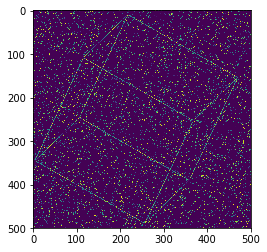

In [2]:
image = cv2.imread('1.pgm', -1)

plt.imshow(image)

In [3]:
image.shape

(500, 500)

In [9]:
for i in range(250):
    for j in range(250):
        helper = np.array([image[2*j][2*i], image[2*j+1][2*i], image[2*j+1][2*i+1], image[2*j][2*i+1]]).mean()
        if helper > 100 and helper < 200:
            image[2*j][2*i] = helper
            image[2*j+1][2*i] = helper
            image[2*j+1][2*i+1] = helper
            image[2*j][2*i+1] = helper
            
        if helper >= 200:
            image[2*j][2*i] = 255
            image[2*j+1][2*i] = 255
            image[2*j+1][2*i+1] = 255
            image[2*j][2*i+1] = 255
            
        if helper <= 100:
            image[2*j][2*i] = 0
            image[2*j+1][2*i] = 0
            image[2*j+1][2*i+1] = 0
            image[2*j][2*i+1] = 0
            
            
for i in range(495):
    for j in range(495):
        s = 0
        for k in range(5):
            for l in range(5):
                s += image[i+k][j+l]
        if s < 400:
            for k in range(2):
                for l in range(2):
                    image[i+k+1][j+l+1] = 0

            
x_y = list()


for i in range(500):
    for j in range(500):
        if image[j][i] > 120:
            d = list()
            for psi in range(-90, 85):
                d.append(round(i*cos(psi*pi/180.) + j*sin(psi*pi/180.)))
            x_y.append([[psi*pi/180. for psi in range(-90, 85)], d])
        
x_y = np.array(x_y)


max_d = 0
min_d = 0

for line in x_y:
    if max_d < max(line[1]):
        max_d = max(line[1])
    if min_d > min(line[1]):
        min_d = min(line[1])


plane = np.zeros((int(round(abs(min_d)+max_d))+1, 180))

for line in x_y:
    k = 0
    for psi, d in zip(line[0], line[1]):
        plane[int(round(d+abs(min_d)))][k] += 2
        k += 1
        

plane_max_psi = plane.max(axis=0)
list_V_psi = list()

for j in range(3):
    max_ = max(plane_max_psi)
    for i in range(180):
        if plane_max_psi[i] == max_:
            q_, p_ = i-15, i+15
            if q_ < 0:
                q_ = 0
            if p_ > 175:
                p_ = 0
            plane_max_psi[q_:p_] = 0
            list_V_psi.append(i)
            
            
dct = dict()
dct[list_V_psi[0]] = []
dct[list_V_psi[1]] = []
dct[list_V_psi[2]] = []
plane_max_d = plane.copy()
list_V_d = list()

for key in list_V_psi:
    for j in range(4):
        max_ = max(plane_max_d[:,int(key)])
        for i in range((int(round(abs(min_d)+max_d))+1)):
            if plane_max_d[i, int(key)] == max_:
                q_, p_ = i-50, i+50
                if q_ < min_d:
                    q_ = 0
                if p_ > int(round(abs(min_d)+max_d))+1:
                    p_ = int(round(abs(min_d)+max_d))+1
                plane_max_d[q_:p_,key] = 0
                dct[key].append(i-abs(min_d))
                
                
dct_ = dict()

for key in dct.keys():
    dct_[(float(key)-90)*pi/180] = dct[key]
    
    
img = np.zeros((500, 500))

list_keys = list(dct_.keys())

for pt in list_keys:
    for d in dct_[pt]:
        # print(d)
        for x in range(500):
            if float(pt) != 0:
                y = int(round(d/sin(float(pt)) - x/tan(float(pt))))
                if 0 <= y < 500:
                    img[y][x] = 255


uniq = list()


for key in dct_.keys():
    for d in dct_[key]:
        uniq.append([d, float(key)])
        
uniq = np.array(uniq)


for pt in uniq:
    d, psi = pt[0], pt[1]
    for x in range(500):
        if psi != 0:
            y = int(round(d/sin(psi) - x/tan(psi)))
            if 0 <= y < 500:
                test[y][x] = 255


per = list()

for i_line in range(uniq.shape[0]):
    for j_line in range(i_line+1, uniq.shape[0]):
        for k_line in range(j_line+1, uniq.shape[0]):
            #print(uniq[i_line], uniq[j_line], uniq[k_line])
            d1, psi1, d2, psi2, d3, psi3 = uniq[i_line][0], uniq[i_line][1], uniq[j_line][0], uniq[j_line][1], uniq[k_line][0], uniq[k_line][1]
            
            if psi1 != psi2 and psi2 != psi3 and psi1 != psi3:
                x1 = (d1*sin(psi2)-d2*sin(psi1)) / sin(psi2-psi1)
                y1 = d1/sin(psi1) - x1/tan(psi1)
                x2 = (d2*sin(psi3)-d3*sin(psi2)) / sin(psi3-psi2)
                y2 = d2/sin(psi2) - x2/tan(psi2)
                x3 = (d1*sin(psi3)-d3*sin(psi1)) / sin(psi3-psi1)
                y3 = d3/sin(psi3) - x3/tan(psi3)
                per.append([x1, y1, x2, y2, x3, y3])
                
list_V = list()

for qq in per:
    s_ = sum([abs(qq[0]-qq[2]), abs(qq[2]-qq[4]), abs(qq[1]-qq[3]), abs(qq[3]-qq[5])])
    if s_ < 50:
        list_V.append([(qq[0]+qq[2]+qq[4])/3, (qq[1]+qq[3]+qq[5])/3])
    
list_uniq_V = list()

for v_1 in list_V:
    if list_uniq_V:
        is_ = 0
        for v_2 in list_uniq_V:
            if np.sum(abs(v_2[0] - v_1[0])+abs(v_2[1] - v_1[1])) < 50:
                is_ += 1
        if is_ == 0:
            list_uniq_V.append(v_1)
    if not list_uniq_V:

        list_uniq_V.append(v_1)

KeyError: 56

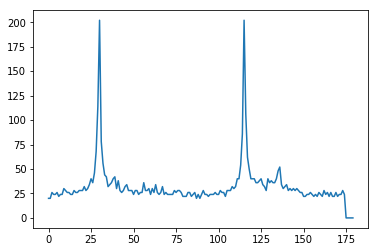

In [7]:
plt.plot([x for x in range(180)], plane.max(axis=0))

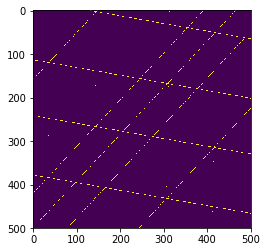

In [64]:
uniq = list()


for key in dct_.keys():
    for d in dct_[key]:
        uniq.append([d, float(key)])
        
uniq = np.array(uniq)


for pt in uniq:
    d, psi = pt[0], pt[1]
    for x in range(500):
        if psi != 0:
            y = int(round(d/sin(psi) - x/tan(psi)))
            if 0 <= y < 500:
                test[y][x] = 255


per = list()

for i_line in range(uniq.shape[0]):
    for j_line in range(i_line+1, uniq.shape[0]):
        for k_line in range(j_line+1, uniq.shape[0]):
            #print(uniq[i_line], uniq[j_line], uniq[k_line])
            d1, psi1, d2, psi2, d3, psi3 = uniq[i_line][0], uniq[i_line][1], uniq[j_line][0], uniq[j_line][1], uniq[k_line][0], uniq[k_line][1]
            
            if psi1 != psi2 and psi2 != psi3 and psi1 != psi3:
                x1 = (d1*sin(psi2)-d2*sin(psi1)) / sin(psi2-psi1)
                y1 = d1/sin(psi1) - x1/tan(psi1)
                x2 = (d2*sin(psi3)-d3*sin(psi2)) / sin(psi3-psi2)
                y2 = d2/sin(psi2) - x2/tan(psi2)
                x3 = (d1*sin(psi3)-d3*sin(psi1)) / sin(psi3-psi1)
                y3 = d3/sin(psi3) - x3/tan(psi3)
                per.append([x1, y1, x2, y2, x3, y3])
                
list_V = list()

for qq in per:
    s_ = sum([abs(qq[0]-qq[2]), abs(qq[2]-qq[4]), abs(qq[1]-qq[3]), abs(qq[3]-qq[5])])
    if s_ < 50:
        list_V.append([(qq[0]+qq[2]+qq[4])/3, (qq[1]+qq[3]+qq[5])/3])
    
list_uniq_V = list()

for v_1 in list_V:
    if list_uniq_V:
        is_ = 0
        for v_2 in list_uniq_V:
            if np.sum(abs(v_2[0] - v_1[0])+abs(v_2[1] - v_1[1])) < 50:
                is_ += 1
        if is_ == 0:
            list_uniq_V.append(v_1)
    if not list_uniq_V:

        list_uniq_V.append(v_1)

In [65]:
per = list()

for i_line in range(uniq.shape[0]):
    for j_line in range(i_line+1, uniq.shape[0]):
        for k_line in range(j_line+1, uniq.shape[0]):
            #print(uniq[i_line], uniq[j_line], uniq[k_line])
            d1, psi1, d2, psi2, d3, psi3 = uniq[i_line][0], uniq[i_line][1], uniq[j_line][0], uniq[j_line][1], uniq[k_line][0], uniq[k_line][1]
            
            if psi1 != psi2 and psi2 != psi3 and psi1 != psi3:
                x1 = (d1*sin(psi2)-d2*sin(psi1)) / sin(psi2-psi1)
                y1 = d1/sin(psi1) - x1/tan(psi1)
                x2 = (d2*sin(psi3)-d3*sin(psi2)) / sin(psi3-psi2)
                y2 = d2/sin(psi2) - x2/tan(psi2)
                x3 = (d1*sin(psi3)-d3*sin(psi1)) / sin(psi3-psi1)
                y3 = d3/sin(psi3) - x3/tan(psi3)
                per.append([x1, y1, x2, y2, x3, y3])
                
list_V = list()

for qq in per:
    s_ = sum([abs(qq[0]-qq[2]), abs(qq[2]-qq[4]), abs(qq[1]-qq[3]), abs(qq[3]-qq[5])])
    if s_ < 50:
        list_V.append([(qq[0]+qq[2]+qq[4])/3, (qq[1]+qq[3]+qq[5])/3])
    
list_uniq_V = list()

for v_1 in list_V:
    if list_uniq_V:
        is_ = 0
        for v_2 in list_uniq_V:
            if np.sum(abs(v_2[0] - v_1[0])+abs(v_2[1] - v_1[1])) < 50:
                is_ += 1
        if is_ == 0:
            list_uniq_V.append(v_1)
    if not list_uniq_V:

        list_uniq_V.append(v_1)

In [67]:
list_uniq_V

[[413.94705499316211, 315.15047011684277],
 [141.67094021150112, 267.04643927439957],
 [37.199413505891677, 119.36685544699081],
 [309.47552828755278, 167.47088628943382],
 [417.83036122316139, 50.896278446336488],
 [145.5542464415004, 2.7922476038927102],
 [33.316107275892421, 383.62104711749771],
 [305.59222205755344, 431.72507795994142]]

In [68]:
dct_

{-1.3962634015954636: [-238.0, -112.0, 22.0, -372.0],
 0.017453292519943295: [419.0, 40.0, 146.0, 313.0],
 0.7504915783575616: [340.0, 286.0, 398.0, 108.0, 518.0]}

In [69]:
list_V

[[413.94705499316211, 315.15047011684277],
 [141.67094021150112, 267.04643927439957],
 [37.199413505891677, 119.36685544699081],
 [309.47552828755278, 167.47088628943382],
 [417.83036122316139, 50.896278446336488],
 [145.5542464415004, 2.7922476038927102],
 [33.316107275892421, 383.62104711749771],
 [305.59222205755344, 431.72507795994142]]

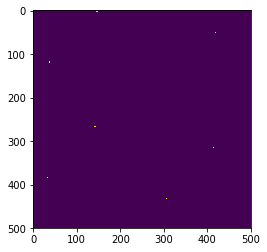

In [70]:
test2 = np.zeros((500, 500))

for v in list_V:
    test2[int(round(v[1]))][int(round(v[0]))] = 255
    test2[int(round(v[1]))][int(round(v[0]))-1] = 255
    test2[int(round(v[1]))][int(round(v[0]))+1] = 255
    test2[int(round(v[1]))+1][int(round(v[0]))] = 255
    test2[int(round(v[1]))-1][int(round(v[0]))] = 255
    
    
plt.imshow(test2)

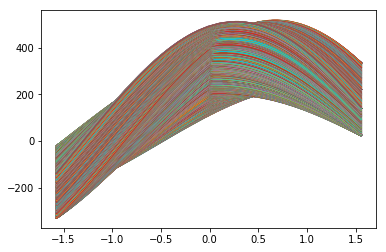

In [7]:
for s in x_y:
    plt.plot(s[0],s[1])

In [60]:
pts = list()

for i in range(300):
    res = [(int(x-abs(min_d)), (y-90)*pi/180, plane[x][y]) for x in range(int(abs(min_d)+max_d)+1) for y in range(180) if plane[x][y] == (300-i)]
    if res:
        pts.extend(res)
    if len(pts) > 100:
        break

In [47]:
pts = list()


for x in range(int(abs(min_d)+max_d)+1):
    for y in range(180):
        if pts:
            if plane[x][y] >= pts[-1][2]:
                pts.append([int(x-abs(min_d)), (y-90)*pi/180, plane[x][y]])
        if not pts:
            pts.append([(int(x-abs(min_d))), (y-90)*pi/180, plane[x][y]])

In [48]:
pts

[[-499, -1.5707963267948966, 10.0],
 [-498, -1.5707963267948966, 10.0],
 [-495, -1.5707963267948966, 16.0],
 [-494, -1.5707963267948966, 16.0],
 [-493, -1.5707963267948966, 22.0],
 [-492, -1.5707963267948966, 22.0],
 [-492, -1.5533430342749535, 22.0],
 [-481, -1.5533430342749535, 24.0],
 [-472, -1.5533430342749535, 24.0],
 [-439, -1.4486232791552935, 24.0],
 [-435, -1.4835298641951802, 24.0],
 [-426, -1.5533430342749535, 24.0],
 [-425, -1.5707963267948966, 28.0],
 [-424, -1.5707963267948966, 28.0],
 [-423, -1.5707963267948966, 36.0],
 [-422, -1.5707963267948966, 36.0],
 [-410, -1.5533430342749535, 43.0],
 [-391, -1.5009831567151233, 44.0],
 [-390, -1.5009831567151233, 44.0],
 [-389, -1.4486232791552935, 50.0],
 [-388, -1.4486232791552935, 52.0],
 [-384, -1.43116998663535, 53.0],
 [-383, -1.43116998663535, 61.0],
 [-382, -1.43116998663535, 64.0],
 [-378, -1.413716694115407, 78.0],
 [-377, -1.413716694115407, 94.0],
 [-376, -1.413716694115407, 94.0],
 [-373, -1.3962634015954636, 134.0],


In [42]:
plane.max(axis=0)

array([  36.,   50.,   48.,   56.,   44.,   44.,   50.,   63.,   72.,
        104.,  200.,  103.,   70.,   58.,   47.,   48.,   48.,   48.,
         41.,   41.,   41.,   42.,   38.,   41.,   42.,   44.,   41.,
         46.,   40.,   42.,   40.,   46.,   43.,   40.,   42.,   42.,
         46.,   41.,   43.,   45.,   42.,   44.,   48.,   45.,   42.,
         61.,   45.,   43.,   47.,   45.,   45.,   43.,   45.,   40.,
         44.,   39.,   44.,   40.,   43.,   50.,   41.,   47.,   40.,
         37.,   39.,   39.,   44.,   47.,   40.,   40.,   37.,   38.,
         42.,   35.,   40.,   39.,   42.,   34.,   44.,   39.,   41.,
         38.,   43.,   45.,   48.,   53.,   52.,   54.,   67.,  110.,
        156.,  172.,   85.,   63.,   55.,   51.,   45.,   45.,   42.,
         44.,   42.,   40.,   40.,   43.,   41.,   37.,   36.,   45.,
         37.,   39.,   40.,   40.,   40.,   40.,   39.,   44.,   47.,
         50.,   39.,   41.,   37.,   43.,   44.,   43.,   38.,   39.,
         40.,   41.,

In [43]:
len(pts)

17

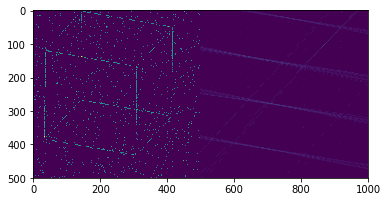

In [61]:
img = np.zeros((500, 500))


for pt in pts:
    d, psi = pt[0], pt[1]
    for x in range(500):
        if psi != 0:
            y = round(d/sin(psi) - x/tan(psi))
            if 0 <= y < 500:
                img[y][x] += 10

plt.imshow(np.hstack((image,img)))

In [62]:
array_pts = np.array(pts)

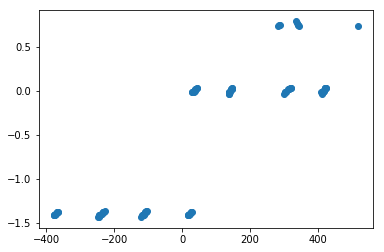

In [63]:
plt.scatter(array_pts[:,0], array_pts[:,1])

In [21]:
min_psi = 999
max_psi = -999

for pt in array_pts[:,1]:
    if pt < min_psi:
        min_psi = pt
    if pt > max_psi:
        max_psi = pt
        
        
mean_psi = (min_psi+max_psi)/2

print(min_psi, mean_psi, max_psi)

####

list_max_psi = list()
list_mean_psi = list()
list_min_psi = list()


for pt in pts:
    if pt[1] > max_psi-0.3:
        list_max_psi.append(pt[1])
    if pt[1] < min_psi+0.3:
        list_min_psi.append(pt[1])
    if pt[1] > min_psi+0.3 and pt[1] < max_psi-0.3:
        list_mean_psi.append(pt[1])
        
min_psi = np.mean(np.array(list_min_psi))
mean_psi = np.mean(np.array(list_mean_psi))
max_psi = np.mean(np.array(list_max_psi))

print(min_psi, mean_psi, max_psi)
####

new_pts = list()


for pt in pts:
    if pt[1] < (min_psi+mean_psi)/2:
        q = tuple([pt[0], min_psi])
    if pt[1] < (max_psi+mean_psi)/2 and pt[1] > (min_psi+mean_psi)/2:
        q = tuple([pt[0], mean_psi])
    if pt[1] > (max_psi+mean_psi)/2:
        q = tuple([pt[0], max_psi])
    new_pts.append(q)

array_new_pts = np.array(new_pts)

-1.43116998664 -0.322885911619 0.785398163397
-1.39774878819 0.00779827963657 0.75298490586


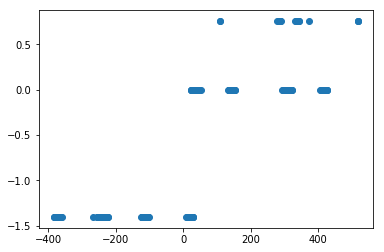

In [16]:
plt.scatter(array_new_pts[:,0], array_new_pts[:,1])

In [21]:
dct_psi1 = dict()
dct_psi2 = dict()
dct_psi3 = dict()
        
for line in array_new_pts:
    if line[1] == min_psi:
        is_ = False
        for key in dct_psi1.keys():
            if float(key) - 25 < line[0] and float(key) + 25 > line[0]:
                lst = dct_psi1[key]
                lst.append(line[0])
                is_ = True
        if not is_:
            dct_psi1[str(line[0])] = list()
    if line[1] == mean_psi:
        is_ = False
        for key in dct_psi2.keys():
            if float(key) - 25 < line[0] and float(key) + 25 > line[0]:
                lst = dct_psi2[key]
                lst.append(line[0])
                is_ = True
        if not is_:
            dct_psi2[str(line[0])] = list()
    if line[1] == max_psi:
        is_ = False
        for key in dct_psi3.keys():
            if float(key) - 25 < line[0] and float(key) + 25 > line[0]:
                lst = dct_psi3[key]
                lst.append(line[0])
                is_ = True
        if not is_:
            dct_psi3[str(line[0])] = list()

In [22]:
d_psi1 = list()
d_psi2 = list()
d_psi3 = list()


for key in dct_psi1.keys():
    lst = dct_psi1[key]
    lst.append(float(key))
    d_psi1.append(np.mean(np.array(lst)))
    
for key in dct_psi2.keys():
    lst = dct_psi2[key]
    lst.append(float(key))
    d_psi2.append(np.mean(np.array(lst)))
    
for key in dct_psi3.keys():
    lst = dct_psi3[key]
    lst.append(float(key))
    d_psi3.append(np.mean(np.array(lst)))

In [23]:
dct = {min_psi: d_psi1, mean_psi: d_psi2, max_psi: d_psi3}

In [24]:
d_psi1

[-212.85714285714286, -125.0, -323.60000000000002, -15.666666666666666]

In [25]:
d_psi2

[99.5, 171.33333333333334, -43.0, -114.33333333333333]

In [26]:
d_psi3

[503.0, 193.5, 308.5, 388.0]

In [27]:
new_new_pts = list()


for pt in new_pts:
    if pt[1] == min_psi:
        for d in dct[min_psi]:
            if d-25 <= pt[0] <= d+25:
                q = tuple([d, min_psi])
        
    if pt[1] == mean_psi:
        for d in dct[mean_psi]:
            if d-25 <= pt[0] <= d+25:
                q = tuple([d, mean_psi])
                
    if pt[1] == max_psi:
        for d in dct[max_psi]:
            if d-25 <= pt[0] <= d+25:
                q = tuple([d, max_psi])
    
    new_new_pts.append(q)
    
new_new_pts = np.array(new_new_pts)

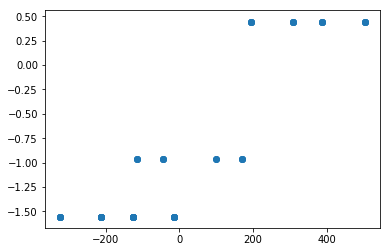

In [28]:
plt.scatter(new_new_pts[:,0], new_new_pts[:,1])

In [29]:
uniq = list()


for s in new_new_pts:
    if uniq:
        is_ = 0
        for u in uniq:
            if s[0] == u[0] and s[1] == u[1]:
                is_ += 1
        if is_ == 0:
            uniq.append(s)
                
    if not uniq:
        uniq.append(s)
        
uniq = np.array(uniq)

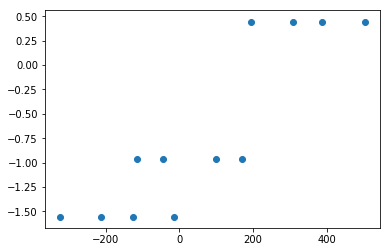

In [30]:
plt.scatter(uniq[:,0], uniq[:,1])

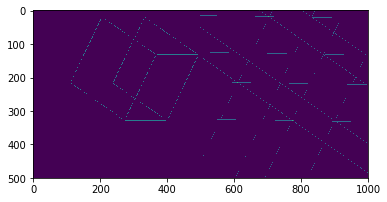

In [31]:
test = np.zeros((500, 500))


for pt in uniq:
    d, psi = pt[0], pt[1]
    for x in range(500):
        if psi != 0:
            y = int(round(d/sin(psi) - x/tan(psi)))
            if 0 <= y < 500:
                test[y][x] +=100

plt.imshow(np.hstack((image,test)))

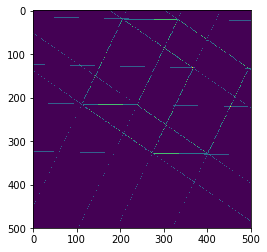

In [32]:
plt.imshow(image + test)

In [33]:
per = list()

for i_line in range(uniq.shape[0]):
    for j_line in range(i_line+1, uniq.shape[0]):
        for k_line in range(j_line+1, uniq.shape[0]):
            #print(uniq[i_line], uniq[j_line], uniq[k_line])
            d1, psi1, d2, psi2, d3, psi3 = uniq[i_line][0], uniq[i_line][1], uniq[j_line][0], uniq[j_line][1], uniq[k_line][0], uniq[k_line][1]
            
            if psi1 != psi2 and psi2 != psi3 and psi1 != psi3:
                
                x1 = (d1*sin(psi2)-d2*sin(psi1)) / sin(psi2-psi1)
                y1 = d1/sin(psi1) - x1/tan(psi1)
                x2 = (d2*sin(psi3)-d3*sin(psi2)) / sin(psi3-psi2)
                y2 = d2/sin(psi2) - x2/tan(psi2)
                x3 = (d1*sin(psi3)-d3*sin(psi1)) / sin(psi3-psi1)
                y3 = d3/sin(psi3) - x3/tan(psi3)
                per.append([x1, y1, x2, y2, x3, y3])
                
list_V = list()

for qq in per:
    if sum([abs(qq[0]-qq[2]), abs(qq[2]-qq[4]), abs(qq[1]-qq[3]), abs(qq[3]-qq[5])]) < 20:
        list_V.append([(qq[0]+qq[2]+qq[4])/3, (qq[1]+qq[3]+qq[5])/3])
    

In [34]:
list_V = list()

for qq in per:
    if sum([abs(qq[0]-qq[2]), abs(qq[2]-qq[4]), abs(qq[1]-qq[3]), abs(qq[3]-qq[5])]) < 20:
        list_V.append([(qq[0]+qq[2]+qq[4])/3, (qq[1]+qq[3]+qq[5])/3])
    

In [35]:
per

[[451.98190493599208,
  220.77894046638329,
  462.56048590782859,
  198.60048424244337,
  495.77289606052926,
  221.54331505973312],
 [451.98190493599208,
  220.77894046638329,
  493.88291344775337,
  132.93164927571092,
  625.43491311664832,
  223.80657398617132],
 [451.98190493599208,
  220.77894046638329,
  400.42434774858094,
  328.8716069722725,
  238.5547415756528,
  217.05355547248328],
 [451.98190493599208,
  220.77894046638329,
  369.319941746057,
  394.08335028030388,
  109.79524435983159,
  214.80605008845643],
 [111.90934189952921,
  214.84295179827643,
  204.63918394125855,
  20.430795021231233,
  495.77289606052926,
  221.54331505973312],
 [111.90934189952921,
  214.84295179827643,
  235.96161148118338,
  -45.238039945501328,
  625.43491311664832,
  223.80657398617132],
 [111.90934189952921,
  214.84295179827643,
  142.5030457820109,
  150.70191775106036,
  238.5547415756528,
  217.05355547248328],
 [111.90934189952921,
  214.84295179827643,
  111.39863977948697,
  215.91

In [36]:
CUBE

NameError: name 'CUBE' is not defined

In [37]:
list_V

[[111.03440867961592, 215.18755431527487],
 [238.38731392617123, 217.00200915619277],
 [494.12182103744846, 133.40791945716447],
 [366.39540199832692, 131.74057732167645],
 [401.02051833303727, 330.06009274955022],
 [273.66761308648205, 328.24563790863232],
 [204.23779909901032, 19.630621063198888],
 [331.96421813813186, 21.297963198686915]]

In [ ]:
with open('output.txt', 'w') as f:
    for v in list_V:
        f.write(str(v[0])+' '+str(v[1]))
        f.write('\n')